In [36]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:

# Define function to evaluate models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

In [38]:
# Load the Wine dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target'] = wine.target


In [39]:
# Display first few rows
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines

In [40]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [41]:
# Separate features and target variable
X = data.drop("target", axis=1)
y = data["target"]

In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Create preprocessing pipeline
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])


In [44]:
# Preprocess the data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [45]:
# Train and evaluate SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
mae_svr, mse_svr, r2_svr = evaluate_model(y_test, y_pred_svr)
print(f"\nSVR Evaluation:\nMAE: {mae_svr:.4f}\nMSE: {mse_svr:.4f}\nR²: {r2_svr:.4f}\n")



SVR Evaluation:
MAE: 0.1270
MSE: 0.0263
R²: 0.9550



In [46]:
# Train and evaluate Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf, mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest Regressor Evaluation:\nMAE: {mae_rf:.4f}\nMSE: {mse_rf:.4f}\nR²: {r2_rf:.4f}\n")

Random Forest Regressor Evaluation:
MAE: 0.0978
MSE: 0.0648
R²: 0.8889



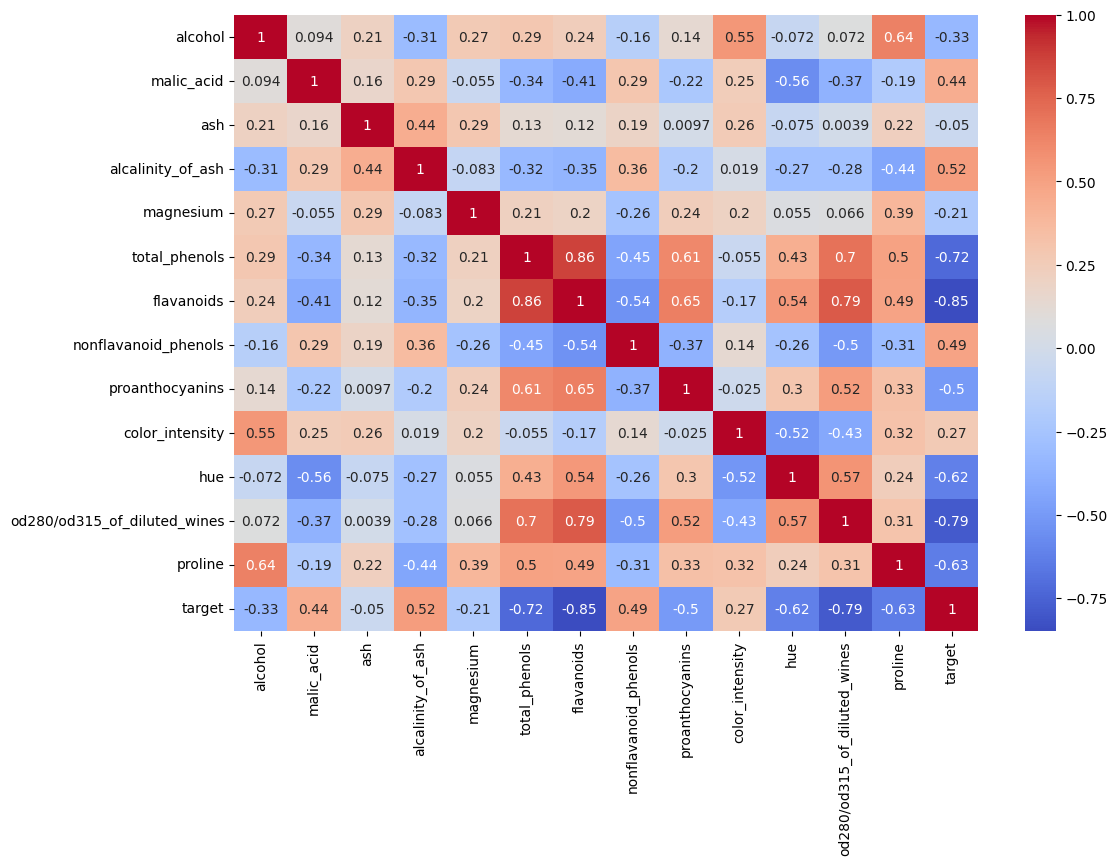

In [47]:
# Plot correlations for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


## Conclusion

### Random Forest Regressor Evaluation:
- **MAE:** 0.0978
- **MSE:** 0.0648
- **R²:** 0.8889

### SVR Evaluation:
- **MAE:** 0.1270
- **MSE:** 0.0263
- **R²:** 0.9550

### Interpretation:
- **MAE (Mean Absolute Error):** Lower values indicate better performance. The Random Forest model has a lower MAE, which means it has slightly smaller average errors compared to SVR.
- **MSE (Mean Squared Error):** Lower values indicate better performance. The SVR model has a lower MSE, indicating it penalizes larger errors less compared to the Random Forest model.
- **R² Score:** Values closer to 1 indicate better performance. The SVR model has a higher R² score, indicating it explains more variance in the target variable compared to the Random Forest model.

Overall, the SVR model seems to perform better in terms of the R² score and MSE, while the Random Forest model performs slightly better in terms of MAE.

### Conclusion
Both the Random Forest Regressor and SVR models perform well on this dataset, but based on the R² score and MSE, the SVR model is slightly better. The Random Forest model, however, has a slightly lower MAE. 
